In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-74.5554331212844 -160.6132793453164
5.144133290554194 78.55651794045355
11.803870896836159 -173.0414165062734
76.05162977536685 -81.91258533836528
27.160680490109314 -154.43010007868165
-36.132099963334944 -77.70719465453678
49.90433341752009 -157.6159267307284
-37.635937960207556 -81.00101992438941
84.04986943349533 -143.62746048540208
-31.760848410802843 -114.77940454546335
14.883773347337907 90.24333289348965
55.968503049600685 -71.25329400585507
-20.061707031692237 -131.13778373536002
-24.039147499290877 34.389921370146595
-61.16377737082398 10.61617840989598
-55.7606968929907 -36.06232559440522
-39.55291956908492 54.21065364123868
88.81511974723625 -103.89180096279848
63.47878127693173 -157.56174819751973
30.550082731180268 16.20287949773717
88.65872470327372 149.5667153082498
46.52900739866857 -107.04627414982049
-2.8963044249685765 -109.56970435445662
-14.145437401440375 -151.74630972992978
-69.36227723080049 -157.93729189607853
-62.0033944594485 169.14680898932966
-49.31840329

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | galle
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | port blair
Processing Record 11 of Set 1 | chapais
Processing Record 12 of Set 1 | manjacaze
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | surt
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | miles city
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | faanui
Processing Record 23 

Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | ciudad bolivar
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | ongandjera
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | norden
Processing Record 47 of Set 4 | makubetsu
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | rio gallegos
Processing Record 1 of Set 5 | kalmar
Processing Record 2 of Set 5 | sterling
Processing Record 3 of Set 5 | saint-francois
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | raga
Processing Record 9 of Set 5 | humaita
Processing Record 10 of Set 5 | zhigalovo
Processing Record 11 of Set 5 | puteyets
Processing Record 12 of Set 5 | camana
Processing Rec

Processing Record 30 of Set 8 | mazara del vallo
Processing Record 31 of Set 8 | madang
Processing Record 32 of Set 8 | toulepleu
City not found. Skipping...
Processing Record 33 of Set 8 | blacksburg
Processing Record 34 of Set 8 | sabang
Processing Record 35 of Set 8 | sume
Processing Record 36 of Set 8 | tasiilaq
Processing Record 37 of Set 8 | vestmanna
Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | lokosovo
Processing Record 40 of Set 8 | spokane
Processing Record 41 of Set 8 | coihueco
Processing Record 42 of Set 8 | hollola
Processing Record 43 of Set 8 | manacapuru
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | gat
Processing Record 46 of Set 8 | hanyang
Processing Record 47 of Set 8 | sitka
Processing Record 48 of Set 8 | lucapa
Processing Record 49 of Set 8 | capanema
Processing Record 50 of Set 8 | tamandare
Processing Record 1 of Set 9 | gediz
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | luau
Proc

Processing Record 17 of Set 12 | qixingtai
Processing Record 18 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 12 | peace river
Processing Record 20 of Set 12 | moyale
Processing Record 21 of Set 12 | san matias
Processing Record 22 of Set 12 | bhatkal
Processing Record 23 of Set 12 | mayo
Processing Record 24 of Set 12 | ampanihy
Processing Record 25 of Set 12 | znamenskoye
Processing Record 26 of Set 12 | marathopolis
City not found. Skipping...
Processing Record 27 of Set 12 | belomorsk
Processing Record 28 of Set 12 | sansepolcro
Processing Record 29 of Set 12 | mount isa
Processing Record 30 of Set 12 | kenai
Processing Record 31 of Set 12 | sumbe
Processing Record 32 of Set 12 | umm bab
Processing Record 33 of Set 12 | agsu
City not found. Skipping...
Processing Record 34 of Set 12 | groningen
Processing Record 35 of Set 12 | petrolina
Processing Record 36 of Set 12 | lata
Processing Record 37 of Set 12 | pleasant point
Processing Record 38 of

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,57.67,99,100,2.24,NZ,2023-01-04 12:25:17
1,Galle,6.0367,80.2170,78.51,72,95,5.03,LK,2023-01-04 12:25:18
2,Kapaa,22.0752,-159.3190,73.72,95,100,18.41,US,2023-01-04 12:25:18
3,Qaanaaq,77.4840,-69.3632,-22.95,79,8,3.60,GL,2023-01-04 12:25:19
4,Kahului,20.8947,-156.4700,71.83,89,40,9.22,US,2023-01-04 12:20:56
5,Lebu,-37.6167,-73.6500,59.74,85,36,20.62,CL,2023-01-04 12:25:20
6,Kodiak,57.7900,-152.4072,33.31,93,100,11.50,US,2023-01-04 12:25:20
7,Tuktoyaktuk,69.4541,-133.0374,-2.49,99,87,5.32,CA,2023-01-04 12:25:21
8,Rikitea,-23.1203,-134.9692,77.67,77,81,13.04,PF,2023-01-04 12:25:21
9,Port Blair,11.6667,92.7500,82.44,74,40,6.91,IN,2023-01-04 12:20:55


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [23]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2023-01-04 12:25:17,-46.1927,168.8643,57.67,99,100,2.24
1,Galle,LK,2023-01-04 12:25:18,6.0367,80.2170,78.51,72,95,5.03
2,Kapaa,US,2023-01-04 12:25:18,22.0752,-159.3190,73.72,95,100,18.41
3,Qaanaaq,GL,2023-01-04 12:25:19,77.4840,-69.3632,-22.95,79,8,3.60
4,Kahului,US,2023-01-04 12:20:56,20.8947,-156.4700,71.83,89,40,9.22
5,Lebu,CL,2023-01-04 12:25:20,-37.6167,-73.6500,59.74,85,36,20.62
6,Kodiak,US,2023-01-04 12:25:20,57.7900,-152.4072,33.31,93,100,11.50
7,Tuktoyaktuk,CA,2023-01-04 12:25:21,69.4541,-133.0374,-2.49,99,87,5.32
8,Rikitea,PF,2023-01-04 12:25:21,-23.1203,-134.9692,77.67,77,81,13.04
9,Port Blair,IN,2023-01-04 12:20:55,11.6667,92.7500,82.44,74,40,6.91


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

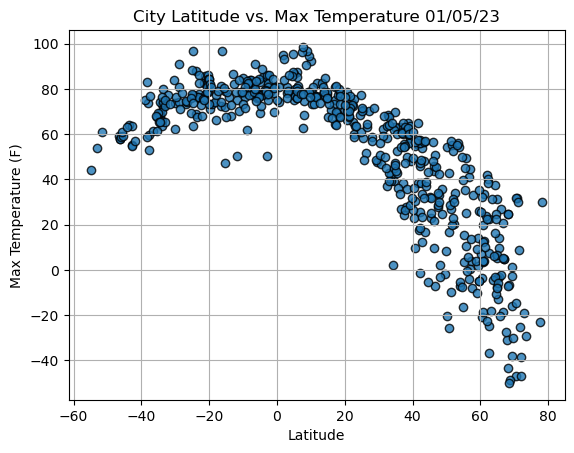

In [26]:
#  Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

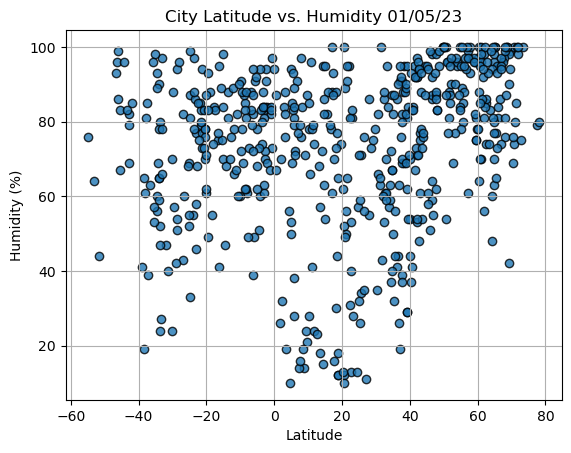

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

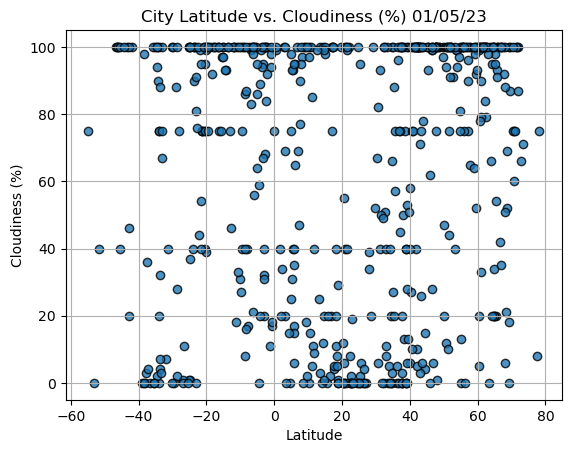

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

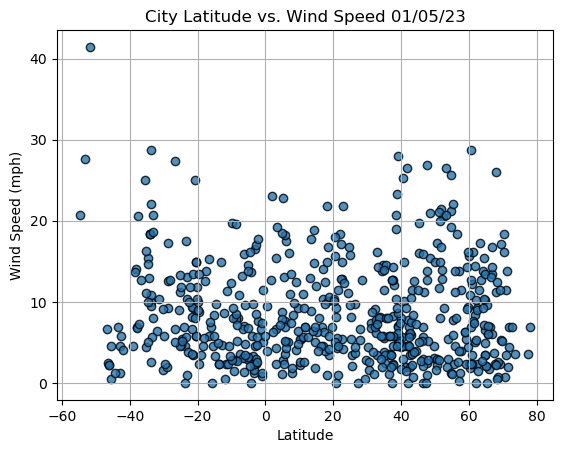

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2023-01-04 12:24:46
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    73.83
Humidity                       61
Cloudiness                      0
Wind Speed                   6.91
Name: 13, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Galle,LK,2023-01-04 12:25:18,6.0367,80.2170,78.51,72,95,5.03
2,Kapaa,US,2023-01-04 12:25:18,22.0752,-159.3190,73.72,95,100,18.41
3,Qaanaaq,GL,2023-01-04 12:25:19,77.4840,-69.3632,-22.95,79,8,3.60
4,Kahului,US,2023-01-04 12:20:56,20.8947,-156.4700,71.83,89,40,9.22
6,Kodiak,US,2023-01-04 12:25:20,57.7900,-152.4072,33.31,93,100,11.50


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

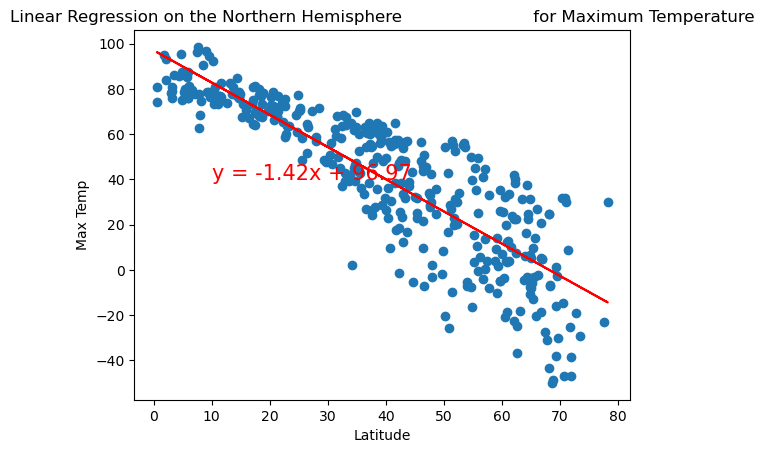

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

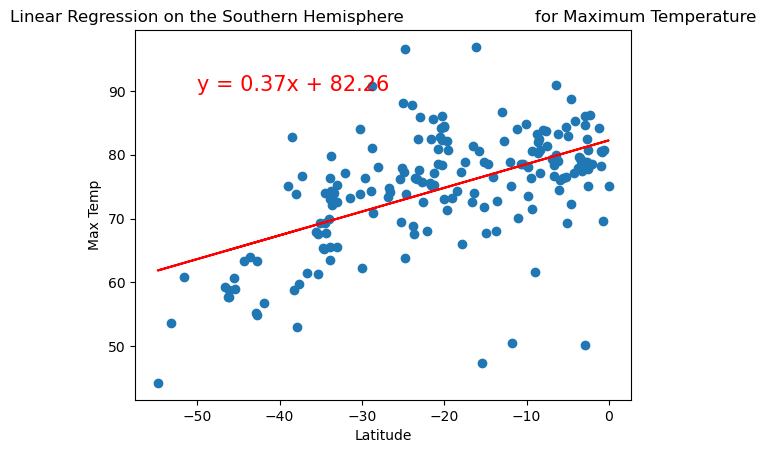

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

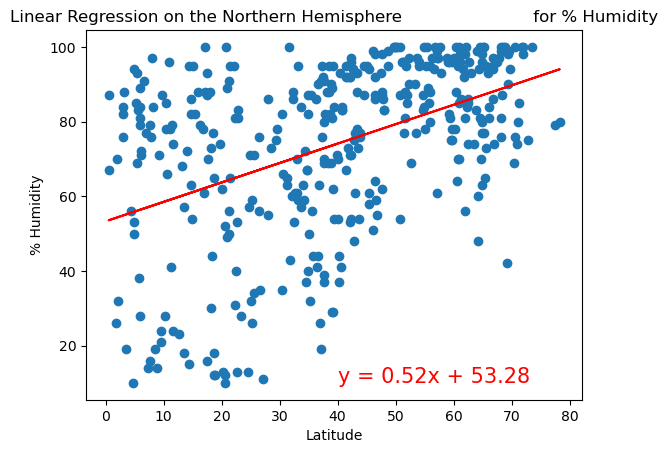

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

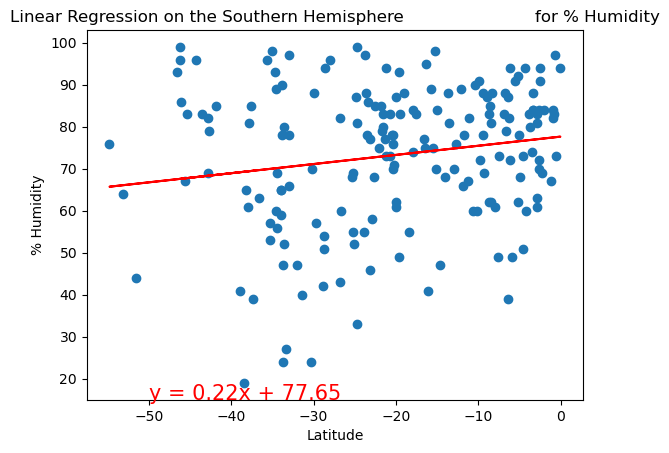

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

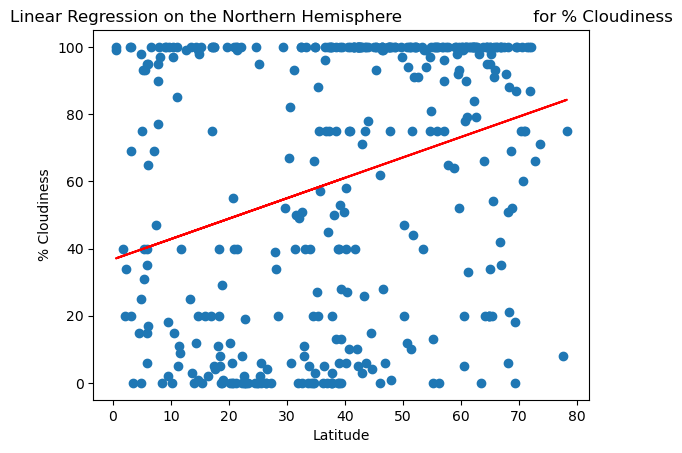

In [44]:
# Linear regression on the Northern Hemisphere--Skill Drill--6.4.4
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

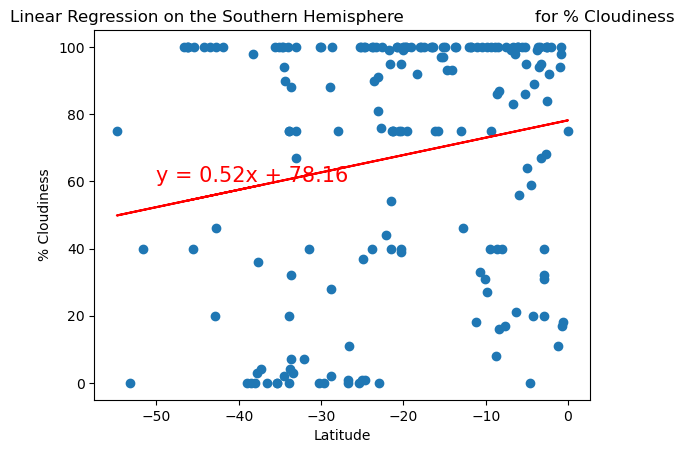

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

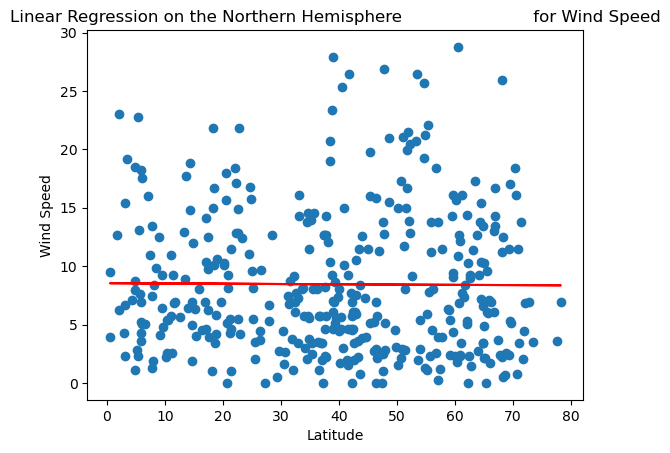

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

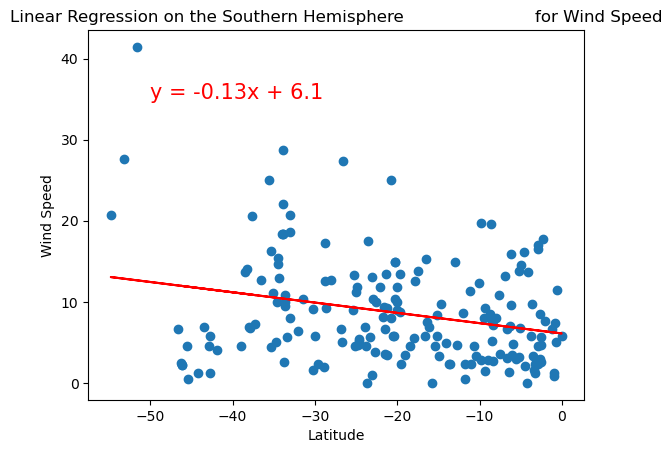

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))